In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2, os, PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

data_dir = keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))


[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [6]:
image_count =  len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

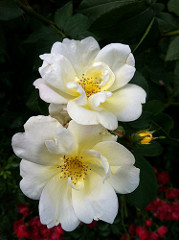

In [8]:
import PIL.Image


PIL.Image.open(str(roses[0]))

In [9]:
tulip = list(data_dir.glob('tulips/*'))
tulip[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

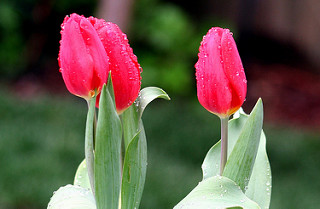

In [10]:
PIL.Image.open(str(tulip[0]))

In [11]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_image_dict['daisy']

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [13]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [14]:
x, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
len(x_train), len(x_test)

(2752, 918)

In [18]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [19]:
x_train_scaled.shape

(2752, 180, 180, 3)

In [29]:
x_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [20]:
x_test_scaled

array([[[[0.00784314, 0.10588235, 0.04705882],
         [0.01176471, 0.1254902 , 0.0627451 ],
         [0.00784314, 0.13333333, 0.06666667],
         ...,
         [0.01568627, 0.03921569, 0.03529412],
         [0.01960784, 0.03921569, 0.03529412],
         [0.01960784, 0.03137255, 0.03137255]],

        [[0.        , 0.0745098 , 0.01960784],
         [0.00392157, 0.09411765, 0.03529412],
         [0.        , 0.10196078, 0.03921569],
         ...,
         [0.01176471, 0.03137255, 0.02745098],
         [0.02352941, 0.03529412, 0.03529412],
         [0.01176471, 0.01960784, 0.01960784]],

        [[0.01568627, 0.05882353, 0.01960784],
         [0.00784314, 0.0745098 , 0.02352941],
         [0.        , 0.08235294, 0.02352941],
         ...,
         [0.02352941, 0.03137255, 0.03137255],
         [0.01960784, 0.02745098, 0.02745098],
         [0.01176471, 0.01960784, 0.01960784]],

        ...,

        [[0.00392157, 0.10980392, 0.05882353],
         [0.00392157, 0.08627451, 0.03921569]

# Without Augmentation layer

In [33]:
model = keras.Sequential([
    layers.Conv2D(16, 3, input_shape = (180,180,3), padding='same', strides=(1,1), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, 3, padding='same', strides=(1,1), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, 3, padding='same', strides=(1,1), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax'),
])
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
model.fit(x_train_scaled, y_train, epochs = 8)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 344ms/step - accuracy: 0.3086 - loss: 1.7508
Epoch 2/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 348ms/step - accuracy: 0.5410 - loss: 1.1111
Epoch 3/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 341ms/step - accuracy: 0.6326 - loss: 0.9444
Epoch 4/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 402ms/step - accuracy: 0.6885 - loss: 0.8036
Epoch 5/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 385ms/step - accuracy: 0.7747 - loss: 0.6235
Epoch 6/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 399ms/step - accuracy: 0.8443 - loss: 0.4177
Epoch 7/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 384ms/step - accuracy: 0.9081 - loss: 0.2832
Epoch 8/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 387ms/step - accuracy: 0.9542 - loss: 0.1538


In [34]:
model.evaluate(x_test, y_test)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6042 - loss: 340.5270


[337.9541015625, 0.6111111044883728]

even though my training data has 95% accuracy, my test data got only 60% . this is called overfitting.
to avoid this we have to augmentate our data in training

# With Augmentation layer

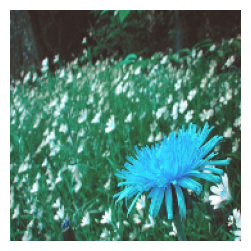

In [52]:
plt.figure(figsize=(5,3))
plt.axis('off')
plt.imshow(x_train_scaled[0])

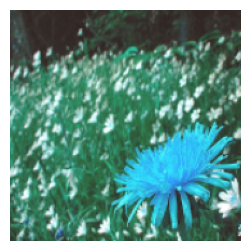

In [75]:
scaled_image = x_train_scaled[0]
image_batch = tf.expand_dims(scaled_image,0)

data_augmentation = keras.Sequential([
    layers.RandomZoom(height_factor=(0.2))
])

augmented_image = data_augmentation(image_batch)
augmented_image = tf.squeeze(augmented_image, axis=0)
augmented_image = augmented_image.numpy()

plt.figure(figsize=(5,3))
plt.axis('off')
plt.imshow(augmented_image)

In [24]:
data_augmentation2 = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model2 = keras.Sequential([
    data_augmentation2,
    layers.Conv2D(16, 3, padding='same', strides=(1,1), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, 3, padding='same', strides=(1,1), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, 3, padding='same', strides=(1,1), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax'),
])
model2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
model2.fit(x_train_scaled, y_train, epochs = 35)

Epoch 1/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.2749 - loss: 1.6779
Epoch 2/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 420ms/step - accuracy: 0.5128 - loss: 1.1652
Epoch 3/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 417ms/step - accuracy: 0.6096 - loss: 1.0139
Epoch 4/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 412ms/step - accuracy: 0.6266 - loss: 0.9292
Epoch 5/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 416ms/step - accuracy: 0.6796 - loss: 0.8540
Epoch 6/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 414ms/step - accuracy: 0.6877 - loss: 0.8103
Epoch 7/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 427ms/step - accuracy: 0.7005 - loss: 0.7871
Epoch 8/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 421ms/step - accuracy: 0.7144 - loss: 0.7376
Epoch 9/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 412ms/step - accuracy: 0.7295 - loss: 0.6962
Epoch 10/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 36s 419ms/step - accuracy: 0.7549 - loss: 0.6537
Epoch 11/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 411ms/step - accuracy: 0.7503 - loss: 0.6741
Epoch 12/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 36

In [31]:
model2.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.7307 - loss: 1.0165


[0.976285994052887, 0.7363834381103516]

So without augmetation it gave me 60% out of 95% accuracy. And with augmentation it increased to 73% out of 91% accuracy.
You can see the importance of augmentation in image classification